In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn as sk

In [3]:
data = pd.read_csv('iris_data.csv', sep=';')
labels = pd.read_csv('iris_labels.csv', sep=';')

In [4]:
data = pd.merge(data, labels, on = 'id', how = 'inner')

data.drop(['examiner'], axis=1, inplace=True)
data.drop(['id'], axis=1, inplace=True)

data.sort_values(by=['species'])
data.describe()

,pl,pw,sl,sw
count,6500.000000,6500.000000,6500.000000,6500.000000
mean,5.758785,3.115462,-5.705508,-8.025246
std,0.917491,0.430596,303.788948,303.712679
min,4.100000,1.800000,-9999.000000,-9999.000000
25%,5.000000,2.900000,1.400000,0.300000
50%,5.700000,3.100000,4.300000,1.400000
75%,6.400000,3.400000,5.400000,2.000000
max,8.000000,4.500000,51.000000,23.000000


In [5]:
# sb.pairplot(data, hue = 'species')

# Task 2

In [6]:
data = data[data['sl'] != -9999]
data.describe()

,pl,pw,sl,sw
count,6494.000000,6494.000000,6494.000000,6494.000000
mean,5.758808,3.115229,3.527595,1.205713
std,0.917403,0.430438,2.102492,0.960172
min,4.100000,1.800000,0.800000,0.100000
25%,5.000000,2.900000,1.400000,0.300000
50%,5.700000,3.100000,4.300000,1.400000
75%,6.400000,3.400000,5.400000,2.000000
max,8.000000,4.500000,51.000000,23.000000


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

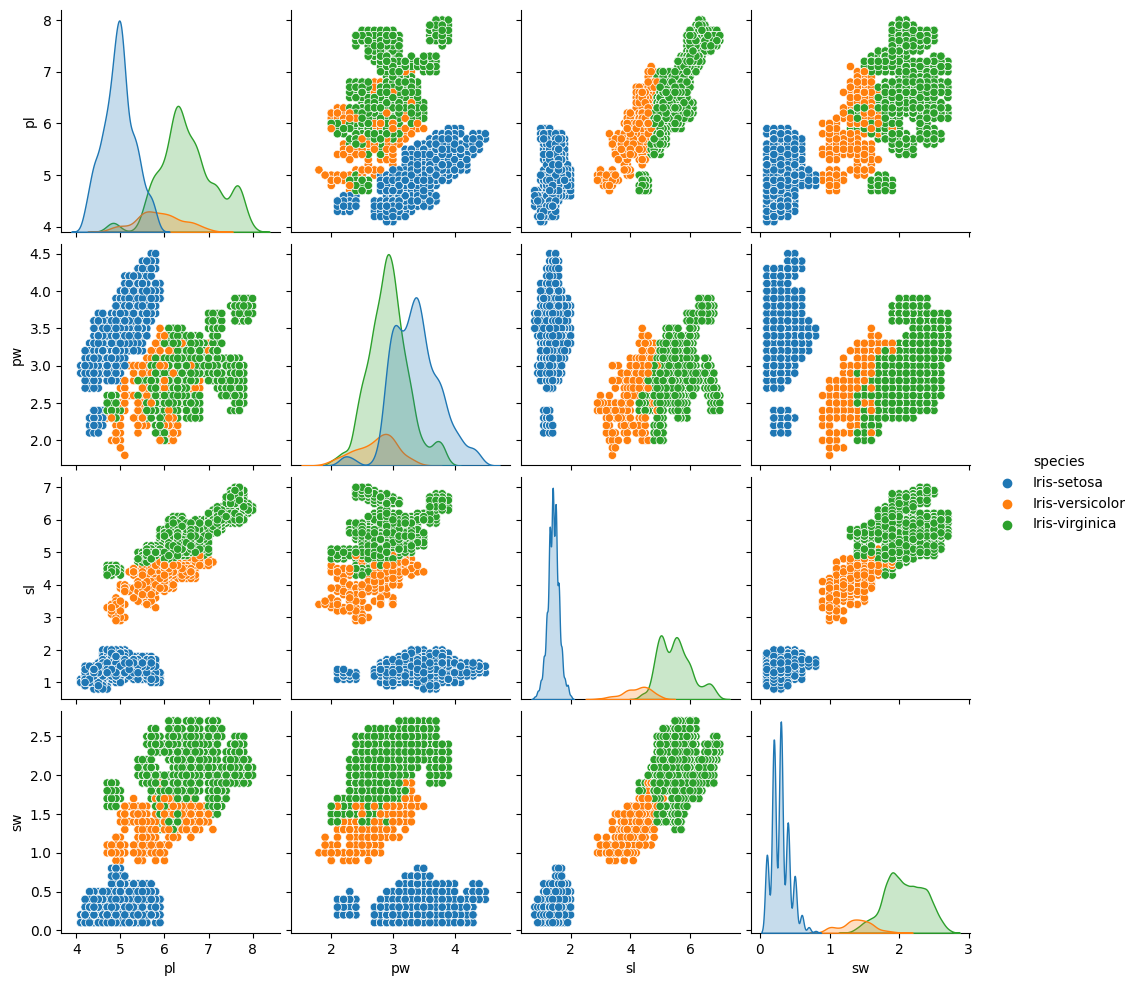

In [7]:
# Found outliers in sapal length and width over 20, removing them
data = data[data['sl'] < 20]
data = data[data['sw'] < 20]

sb.pairplot(data, hue = 'species')

In [8]:
data.describe()

,pl,pw,sl,sw
count,6491.000000,6491.000000,6491.000000,6491.000000
mean,5.758527,3.115329,3.519643,1.199106
std,0.917488,0.430498,2.018383,0.884582
min,4.100000,1.800000,0.800000,0.100000
25%,5.000000,2.900000,1.400000,0.300000
50%,5.700000,3.100000,4.300000,1.400000
75%,6.400000,3.400000,5.400000,2.000000
max,8.000000,4.500000,7.000000,2.700000


# Task 3

In [9]:
separated = data['species']
data.drop('species', axis=1, inplace=True)
print(separated)

0           Iris-setosa
1           Iris-setosa
2           Iris-setosa
3           Iris-setosa
4           Iris-setosa
             ...       
6495    Iris-versicolor
6496    Iris-versicolor
6497    Iris-versicolor
6498    Iris-versicolor
6499    Iris-versicolor
Name: species, Length: 6491, dtype: object


In [10]:
from sklearn.preprocessing import MinMaxScaler

# data.at[0, 'pl'] = 5000

minmax = MinMaxScaler()
minmax_scaled = minmax.fit_transform(data)
minmax_scaled = pd.DataFrame(minmax_scaled, columns=['pl', 'pw', 'sl', 'sw'])
minmax_scaled.describe()

,pl,pw,sl,sw
count,6491.000000,6491.000000,6491.000000,6491.000000
mean,0.425263,0.487159,0.438652,0.422733
std,0.235253,0.159444,0.325546,0.340224
min,0.000000,0.000000,0.000000,0.000000
25%,0.230769,0.407407,0.096774,0.076923
50%,0.410256,0.481481,0.564516,0.500000
75%,0.589744,0.592593,0.741935,0.730769
max,1.000000,1.000000,1.000000,1.000000


In [11]:
# Scaling the pl column to 0-100
# minmax_scaled['pl'] = minmax_scaled['pl']*100

In [12]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_scaled = std.fit_transform(data)
std_scaled = pd.DataFrame(std_scaled, columns=['pl', 'pw', 'sl', 'sw'])
std_scaled.describe()

,pl,pw,sl,sw
count,6.491000e+03,6.491000e+03,6.491000e+03,6.491000e+03
mean,6.225869e-16,3.902457e-16,-5.473292e-18,1.390216e-16
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-1.807823e+00,-3.055598e+00,-1.347540e+00,-1.242610e+00
25%,-8.268075e-01,-5.002236e-01,-1.050249e+00,-1.016497e+00
50%,-6.379563e-02,-3.561011e-02,3.866548e-01,2.271230e-01
75%,6.992162e-01,6.613102e-01,9.316874e-01,9.054614e-01
max,2.443243e+00,3.216685e+00,1.724462e+00,1.696856e+00


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
principalComponents = pca.fit_transform(minmax_scaled)
principalComponents

array([[-0.54759743, -0.07547247],
       [-0.55861549,  0.10930914],
       [-0.58928261,  0.05594639],
       ...,
       [-0.04931022,  0.31588132],
       [ 0.24521815, -0.09856324],
       [ 0.26643777,  0.03602396]])

In [14]:
pd.DataFrame(pca.components_, columns=["Sepal L", "Sepal W", "Petal L", "Petal W"],index = ['PC 1', 'PC 2'])

,Sepal L,Sepal W,Petal L,Petal W
PC 1,0.412811,-0.134734,0.626319,0.647424
PC 2,-0.479639,-0.872916,0.062045,0.064145


In [15]:
pca.explained_variance_ratio_

array([0.8810743 , 0.08266405])

# Task 4

## Random Sampling

In [16]:
# Adding species back to the data
data['species'] = separated

sample = data.sample(150, random_state=0)
no_vir = (sample['species'] == 'Iris-virginica').sum()
no_set = (sample['species'] == 'Iris-setosa').sum()
no_ver = (sample['species'] == 'Iris-versicolor').sum()


print('versicolor: ', no_ver)
print('setosa: ', no_set)
print('virginica: ', no_vir)

# sample['pw'].duplicated().any()

versicolor:  13
setosa:  75
virginica:  62


## Bootstrapping

In [17]:
sample = data.sample(150, random_state=1, replace=True)

no_vir = (sample['species'] == 'Iris-virginica').sum()
no_set = (sample['species'] == 'Iris-setosa').sum()
no_ver = (sample['species'] == 'Iris-versicolor').sum()


print('versicolor: ', no_ver)
print('setosa: ', no_set)
print('virginica: ', no_vir)

versicolor:  11
setosa:  74
virginica:  65


## Stratified proportional

In [18]:
sample = data.groupby('species', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=1))

no_vir = (sample['species'] == 'Iris-virginica').sum()
no_set = (sample['species'] == 'Iris-setosa').sum()
no_ver = (sample['species'] == 'Iris-versicolor').sum()


print('versicolor: ', no_ver)
print('setosa: ', no_set)
print('virginica: ', no_vir)

versicolor:  250
setosa:  1498
virginica:  1498


## Stratified balanced

In [19]:
sample = data.groupby('species', group_keys=False).apply(lambda x: x.sample(50))

no_vir = (sample['species'] == 'Iris-virginica').sum()
no_set = (sample['species'] == 'Iris-setosa').sum()
no_ver = (sample['species'] == 'Iris-versicolor').sum()


print('versicolor: ', no_ver)
print('setosa: ', no_set)
print('virginica: ', no_vir)

versicolor:  50
setosa:  50
virginica:  50
